<a href="https://colab.research.google.com/github/OptimisedLEarning/assignments/blob/main/Explainable_Ai_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to install!

In [ ]:
!pip3 install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 12.6 MB/s eta 0:00:00


# Importing Libraries

In [ ]:
# Importing necessary libraries for data handling
import pandas as pd
import numpy as np

# Preprocessing and model selection
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Metrics for model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Visualization
import matplotlib.pyplot as plt

# Neural Network libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Setting options for numpy display
np.set_printoptions(suppress=True, precision=4)

# Building Basic ML Model

In [ ]:
# Load the Boston housing dataset
housing_data = pd.read_csv("HousingData.csv")
print(f"Shape of the dataset: {housing_data.shape}")
housing_data

Shape of the dataset: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
# Load the Boston housing dataset
housing_data = pd.read_csv("HousingData.csv")
print(f"Shape of the dataset: {housing_data.shape}")

# Preparing the features (X) and target variable (y) for modeling
X = housing_data.drop('MEDV', axis=1)  # Features
y = housing_data['MEDV']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

# Imputation to handle missing values using the median strategy
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Feature scaling for normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled = pd.DataFrame(X_test_scaled, columns = housing_data.columns[:-1])
X_train_scaled = pd.DataFrame(X_train_scaled, columns = housing_data.columns[:-1])

# Setting up features variable
features = housing_data.columns[:-1]

# Final shapes after preprocessing
print(f"Shapes after scaling - Training set: {X_train_scaled.shape}, Testing set: {X_test_scaled.shape}")


Shape of the dataset: (506, 14)
Training set shape: (404, 13), (404,)
Testing set shape: (102, 13), (102,)
Shapes after scaling - Training set: (404, 13), Testing set: (102, 13)


# Linear Regression Model

In [ ]:
# Initialize the Linear Regression Model
lr_model = LinearRegression()

# Fit the model with scaled training data
lr_model_fitted = lr_model.fit(X_train_scaled, y_train)

# Predictions on training and testing sets
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE) for training and testing sets
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Display the performance metrics
print(f"Training Set Mean Absolute Error: {train_mae:.2f}")
print(f"Testing Set Mean Absolute Error: {test_mae:.2f}\n")

# Display the model coefficients and intercept
coefficients = lr_model.coef_
print("Model Coefficients:")
for idx, coef in enumerate(coefficients):
    print(f"  Coefficient for feature {idx + 1}: {coef:.4f}")

print(f"\nModel Intercept: {lr_model.intercept_:.4f}")


Training Set Mean Absolute Error: 3.35
Testing Set Mean Absolute Error: 3.15

Model Coefficients:
  Coefficient for feature 1: -0.9942
  Coefficient for feature 2: 0.6514
  Coefficient for feature 3: -0.1730
  Coefficient for feature 4: 0.8332
  Coefficient for feature 5: -1.8790
  Coefficient for feature 6: 3.3376
  Coefficient for feature 7: -0.4936
  Coefficient for feature 8: -3.2083
  Coefficient for feature 9: 1.8700
  Coefficient for feature 10: -1.5017
  Coefficient for feature 11: -1.9830
  Coefficient for feature 12: 1.0960
  Coefficient for feature 13: -3.0971

Model Intercept: 22.7965


# Understanding Reason for Prediction

In [ ]:
pd.DataFrame(X_test, columns = features).iloc[0: 1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.09178,0.0,8.56,0.0,0.51,6.416,76.95,2.6463,5.0,296.0,16.6,395.5,9.04


In [ ]:
pd.DataFrame(X_test_scaled, columns = features).iloc[0: 1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.380867,-0.479141,-0.330101,-0.272888,-0.395412,0.141282,0.302457,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.486011


In [ ]:
pd.DataFrame([coefficients], columns = features)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.994222,0.651371,-0.173042,0.833225,-1.87903,3.337582,-0.493596,-3.208267,1.869956,-1.501738,-1.983047,1.095963,-3.097111


In [ ]:
X_test_scaled.iloc[0]

CRIM      -0.380867
ZN        -0.479141
INDUS     -0.330101
CHAS      -0.272888
NOX       -0.395412
RM         0.141282
AGE        0.302457
DIS       -0.545853
RAD       -0.507797
TAX       -0.650926
PTRATIO   -0.771951
B          0.428872
LSTAT     -0.486011
Name: 0, dtype: float64

In [ ]:
# Calculate the weighted sum of the first row of scaled test data and model coefficients
weighted_sum = np.sum(X_test_scaled.iloc[0] * coefficients)

# Add the model's intercept to the weighted sum to get the predicted value
predicted_value_with_intercept = weighted_sum + lr_model.intercept_
print(f"Predicted Value with Intercept: {predicted_value_with_intercept:.4f}")

# Print the first predicted value from the model for comparison
print(f"Model's First Predicted Value: {y_test_pred[0]:.4f}")

# Compare the calculated prediction with the actual value from the test set
calculated_prediction = predicted_value_with_intercept
actual_value = y_test.iloc[0]
print(f"\nCalculated Prediction: {calculated_prediction:.4f}")
print(f"Actual Value: {actual_value:.4f}")


Predicted Value with Intercept: 29.0434
Model's First Predicted Value: 29.0434

Calculated Prediction: 29.0434
Actual Value: 23.6000


# RandomForest Model


In [ ]:
# Building the RandomForest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

# Making predictions
y_train_pred_rf = rf_regressor.predict(X_train_scaled)
y_test_pred_rf = rf_regressor.predict(X_test_scaled)

# Performance Metrics
train_mae = mean_absolute_error(y_train, y_train_pred_rf)
test_mae = mean_absolute_error(y_test, y_test_pred_rf)

print(f'Train MAE : {train_mae}  Test MAE : {test_mae}')

Train MAE : 0.9561732673267312  Test MAE : 2.0501764705882346


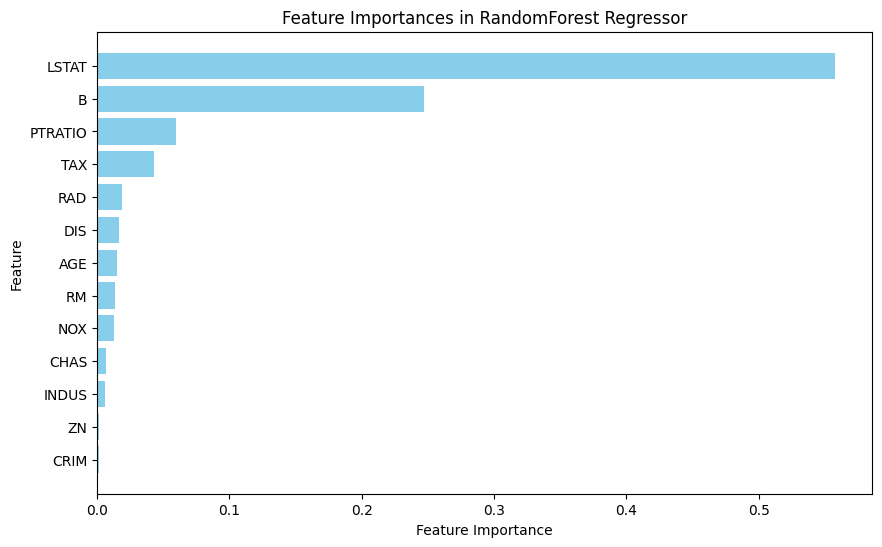

In [ ]:
# Getting feature importances
feature_importances_rf = rf_regressor.feature_importances_
features = housing_data.columns[:-1]

# Sorting the features by their importance and re-plotting
sorted_idx = np.argsort(feature_importances_rf)
sorted_features = features[sorted_idx]
sorted_importances = feature_importances_rf[sorted_idx]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(features , sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in RandomForest Regressor')
plt.show()

In [ ]:
pd.DataFrame(X_test_scaled, columns = features).iloc[0: 1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.380867,-0.479141,-0.330101,-0.272888,-0.395412,0.141282,0.302457,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.486011


In [ ]:
y_test_pred_rf[0]

23.101999999999986

In [ ]:
# Don't execute -
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Get predictions from each tree in the RandomForest model for the first test example
tree_predictions = [tree.predict(np.array(X_test_scaled.iloc[0]).reshape(1, -1)) for tree in rf_model.estimators_]

# Calculate the mean of these predictions to see how it compares to the actual RandomForest prediction
mean_tree_prediction = np.mean(tree_predictions)
actual_random_forest_prediction = rf_model.predict(np.array(X_test_scaled.iloc[0]).reshape(1, -1))

mean_tree_prediction, actual_random_forest_prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


(23.102000000000004, array([23.102]))

# Neural Network

In [ ]:
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression (no activation function)
])

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit the model to the training data
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)
# Evaluate the model on the test set
test_loss = model.evaluate(X_test_scaled, y_test, verbose=0)
test_loss

13.483293533325195

In [ ]:
model.predict(X_test_scaled[0:1])

1/1 [==============================] - 0s 93ms/step


array([[27.807]], dtype=float32)

# Points to Question

1. No specific method to define feature importance that is model agnostic
2. For a given sample, why does the prediction have that value?
3. Random forest is not similar to linear regression so we cannot just simply get coeffiencents.
4. We have to look at multiple trees and the values at each trees and then do some complex calcualtions to understand the predctions.
5. Not easy at all.

# Model Explainability Using Shap Values

In [ ]:
# Creating a DataFrame with all features set to NaN, to simulate a scenario with missing values
nan_frame = pd.DataFrame(data=np.nan, columns=features, index=[0])
print("DataFrame with NaN values:")
print(nan_frame)

# Imputing missing values in the DataFrame using the median strategy
imputed_array = imputer.transform(nan_frame)
print("\nImputed array (missing values filled):")
print(imputed_array)

# Scaling the imputed data
scaled_array = scaler.transform(imputed_array)
print("\nScaled array (after standardization):")
print(scaled_array)

# Predicting the target value using the linear regression model
new_input_prediction = lr_model.predict(scaled_array)
print(f"\nPredicted value for the new input data: {new_input_prediction[0]:.4f}")

DataFrame with NaN values:
   CRIM  ZN  INDUS  CHAS  NOX  RM  AGE  DIS  RAD  TAX  PTRATIO   B  LSTAT
0   NaN NaN    NaN   NaN  NaN NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN

Imputed array (missing values filled):
[[  0.2614   0.       8.56     0.       0.538    6.21    76.95     3.1757
    5.     330.      18.7    391.305   10.97  ]]

Scaled array (after standardization):
[[-0.3616 -0.4791 -0.3301 -0.2729 -0.1572 -0.1494  0.3025 -0.2971 -0.5078
  -0.4461  0.1715  0.383  -0.2088]]

Predicted value for the new input data: 23.7210


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Displaying the actual records from the test data
print("Actual Record in Test Data:")
print("****************************\n")
print(pd.DataFrame(X_test, columns=features).iloc[0: 1])  # Ensure 'features' is defined earlier as the column names

# Displaying the scaled records from the test data
print("\nScaled Record in Test Data:")
print("****************************\n")
print(pd.DataFrame(X_test_scaled, columns=features).iloc[0: 1])  # Ensure 'features' is defined earlier as the column names

# Displaying the actual target value vs model predicted value
print("\nActual Target Value:", y_test.iloc[0])
print("Model Predicted Value:", y_test_pred[0])


Actual Record in Test Data:
****************************

      CRIM   ZN  INDUS  CHAS   NOX     RM    AGE     DIS  RAD    TAX  PTRATIO  \
0  0.09178  0.0   8.56   0.0  0.51  6.416  76.95  2.6463  5.0  296.0     16.6   

       B  LSTAT  
0  395.5   9.04  

Scaled Record in Test Data:
****************************

       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.380867 -0.479141 -0.330101 -0.272888 -0.395412  0.141282  0.302457   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0 -0.545853 -0.507797 -0.650926 -0.771951  0.428872 -0.486011  

Actual Target Value: 23.6
Model Predicted Value: 29.043360564348575


# Partial Dependecy Plots

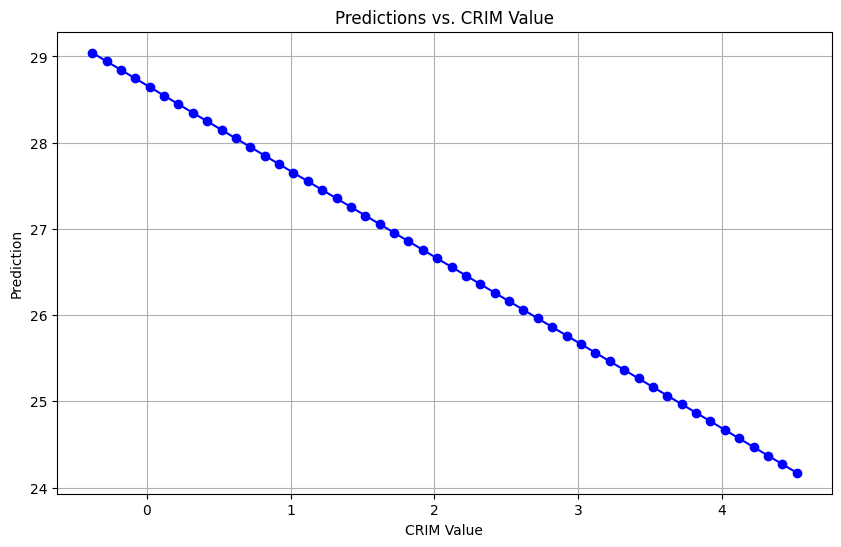

In [ ]:
import pandas as pd  # Ensure pandas is imported

# Assuming 'features' contains the list of column names
features = housing_data.columns[:-1]

# Copy the first row from X_test_scaled as a DataFrame for easy manipulation
row_to_manipulate_df = pd.DataFrame([X_test_scaled.iloc[0].values], columns=features)

# Define the range of values for the first column (e.g., from its current value to +5 in 0.1 increments)
first_column_values = np.arange(row_to_manipulate_df.iloc[0, 0], row_to_manipulate_df.iloc[0, 0] + 5, 0.1)

# Initialize a list to store predictions
predictions = []

# Loop through each value, set it in the first column, and make a prediction
for value in first_column_values:
    row_to_manipulate_df.iloc[0, 0] = value
    prediction = lr_model.predict(row_to_manipulate_df)
    predictions.append(prediction[0])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(first_column_values, predictions, marker='o', linestyle='-', color='blue')
plt.title('Predictions vs. CRIM Value')
plt.xlabel('CRIM Value')
plt.ylabel('Prediction')
plt.grid(True)
plt.show()


In [ ]:
features

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

# Extracting Shap Values

In [ ]:
import shap

In [ ]:
# Initialize the Linear Regression Model
lr_model = LinearRegression()

# Fit the model with scaled training data
lr_model_fitted = lr_model.fit(X_train_scaled, y_train)

In [ ]:
# Initialize the SHAP Explainer
explainer = shap.Explainer(lr_model_fitted, X_train_scaled)

# Calculate SHAP values for the test set
shap_values = explainer(X_test_scaled)

print(shap_values)

.values =
array([[ 0.4311, -0.2476,  0.0618, ...,  1.7114,  0.4805,  1.4725],
       [ 0.4351,  0.885 ,  0.1172, ...,  0.8205,  0.4972,  3.9237],
       [ 0.4295, -0.2476, -0.4326, ..., -1.4067,  0.4159, -2.5446],
       ...,
       [-1.1415, -0.2476, -0.1841, ..., -1.4958, -3.8391, -3.9459],
       [ 0.4356, -0.2476,  0.1667, ...,  0.0187,  0.4863, -0.2269],
       [ 0.4307, -0.2476, -0.0483, ..., -0.1595,  0.3334,  1.517 ]])

.base_values =
array([22.5502, 22.5502, 22.5502, 22.5502, 22.5502, 22.5502, 22.5502,
       22.5502, 22.5502, 22.5502, 22.5502, 22.5502, 22.5502, 22.5502,
       22.5502, 22.5502, 22.5502, 22.5502, 22.5502, 22.5502, 22.5502,
       22.5502, 22.5502, 22.5502, 22.5502, 22.5502, 22.5502, 22.5502,
       22.5502, 22.5502, 22.5502, 22.5502, 22.5502, 22.5502, 22.5502,
       22.5502, 22.5502, 22.5502, 22.5502, 22.5502, 22.5502, 22.5502,
       22.5502, 22.5502, 22.5502, 22.5502, 22.5502, 22.5502, 22.5502,
       22.5502, 22.5502, 22.5502, 22.5502, 22.5502, 22.5502, 22

In [ ]:
X_test_scaled.shape

(102, 13)

In [ ]:
X_test_scaled.iloc[0]

CRIM      -0.380867
ZN        -0.479141
INDUS     -0.330101
CHAS      -0.272888
NOX       -0.395412
RM         0.141282
AGE        0.302457
DIS       -0.545853
RAD       -0.507797
TAX       -0.650926
PTRATIO   -0.771951
B          0.428872
LSTAT     -0.486011
Name: 0, dtype: float64

In [ ]:
shap_values.values.shape

(102, 13)

# Partial Dependancy Plots

In [ ]:
# Function to plot partial dependence for a given feature
def partial_dependence_plot(feature):
    # Find the index of the feature
    feature_index = housing_data.columns.get_loc(feature)

    # Plot the SHAP dependence plot for the feature
    shap.dependence_plot(feature_index, shap_values.values, X_test_scaled,
                         feature_names=housing_data.columns[:-1])

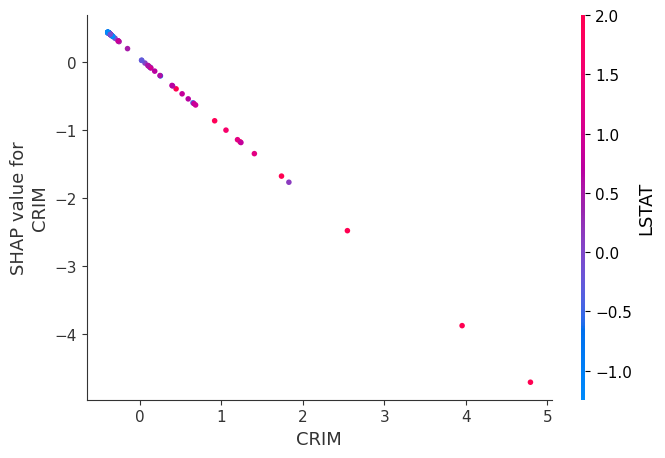

In [ ]:
# Example usage for 'CRIM' feature
partial_dependence_plot('CRIM')

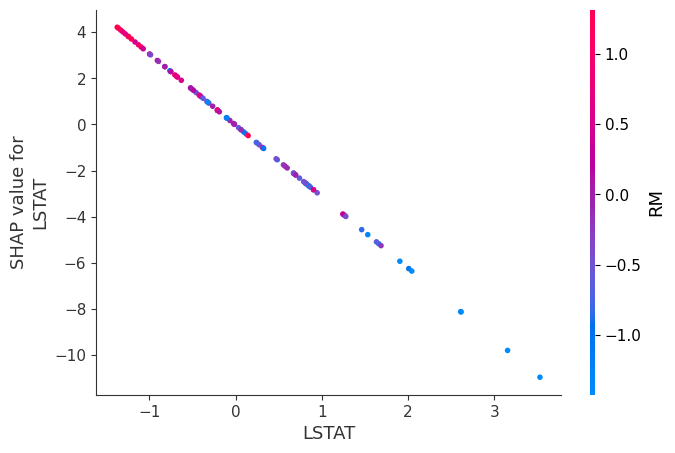

In [ ]:
partial_dependence_plot('LSTAT')

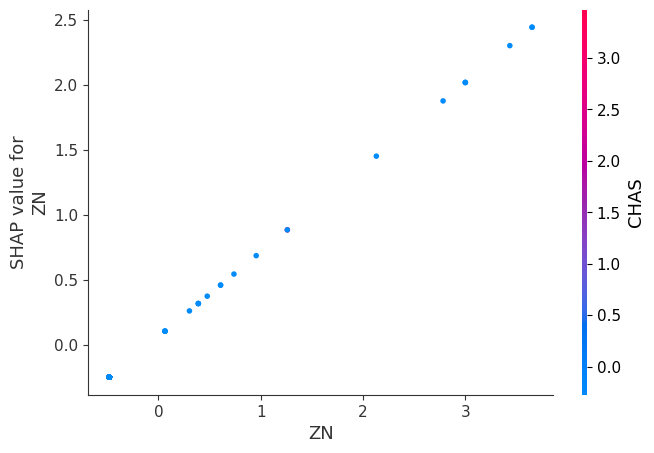

In [ ]:
# Example usage for 'CRIM' feature
partial_dependence_plot('ZN')

# Water Fall Plots

In [ ]:
shap_values[0]

.values =
array([ 0.4311, -0.2476,  0.0618, -0.164 ,  0.8828,  0.3579, -0.172 ,
        1.7048, -1.0441,  1.0183,  1.7114,  0.4805,  1.4725])

.base_values =
22.550155414057404

.data =
array([-0.3809, -0.4791, -0.3301, -0.2729, -0.3954,  0.1413,  0.3025,
       -0.5459, -0.5078, -0.6509, -0.772 ,  0.4289, -0.486 ])

In [ ]:
features

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

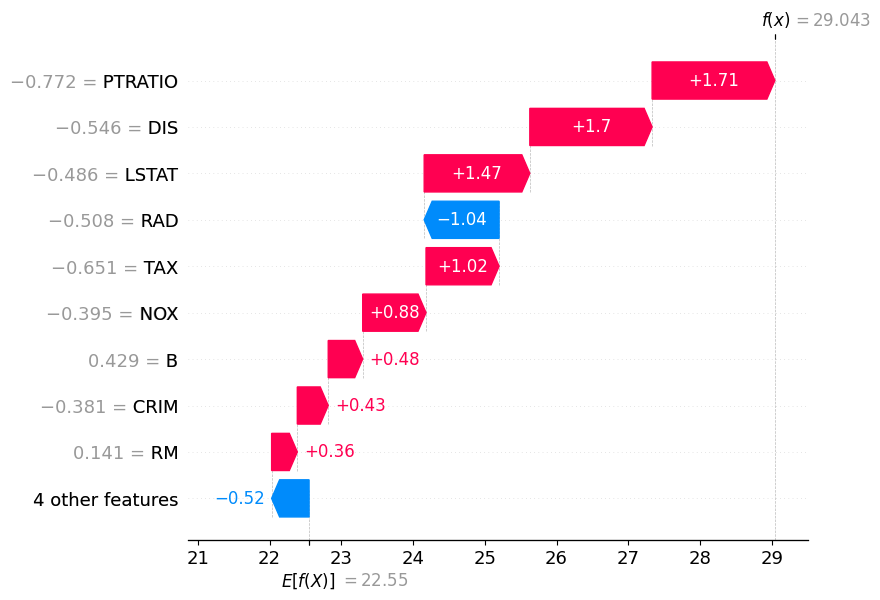

In [ ]:
# Generate a waterfall plot for the first observation in the test set
shap.plots.waterfall(shap_values[0])

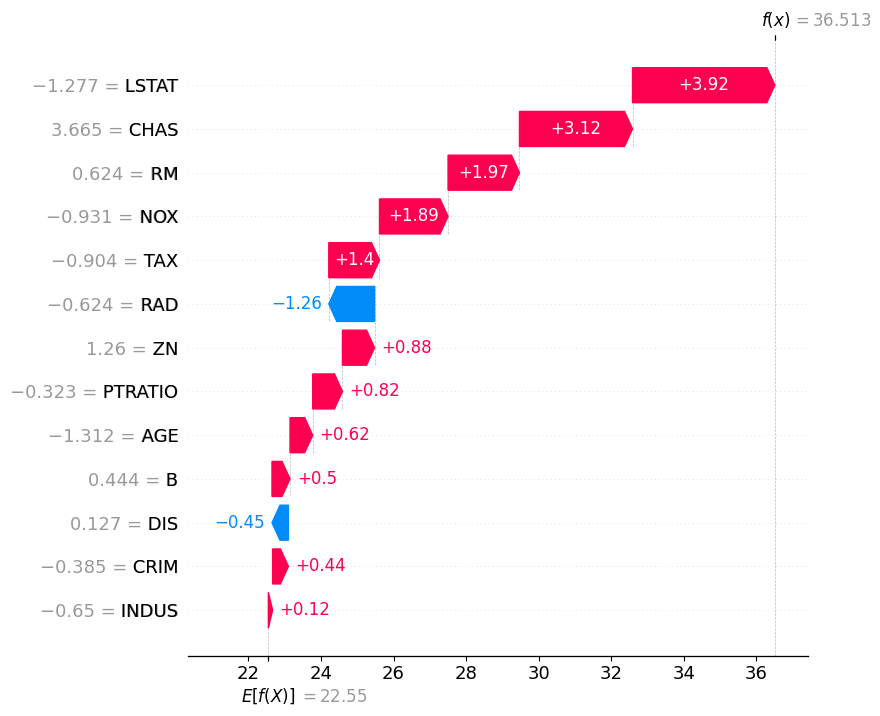

In [ ]:
# Generate a waterfall plot for the first observation in the test set
shap.plots.waterfall(shap_values[1], max_display=20,)

In [ ]:
shap.initjs()
shap.plots.force(shap_values[1])

In [ ]:
shap.initjs()
# For the entire test set
shap.force_plot(explainer.expected_value, shap_values.values, X_test_scaled)

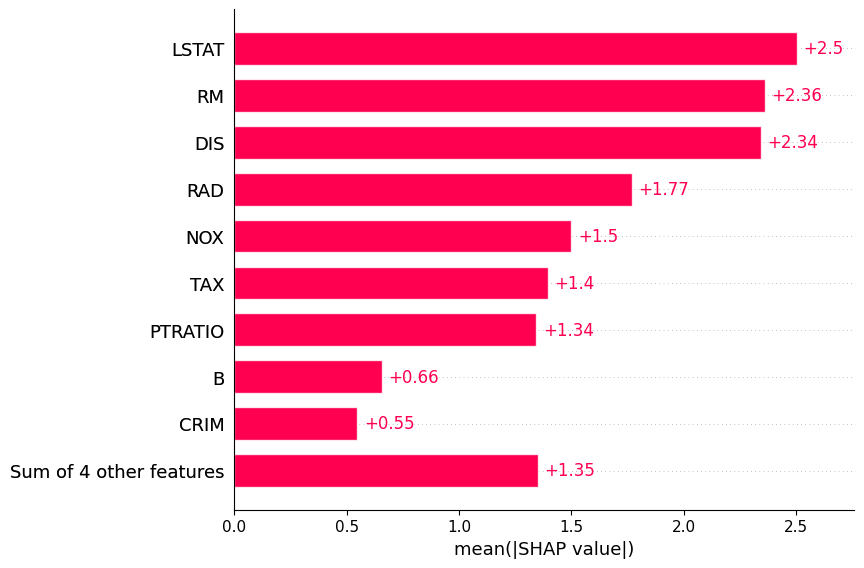

In [ ]:
shap.plots.bar(shap_values)

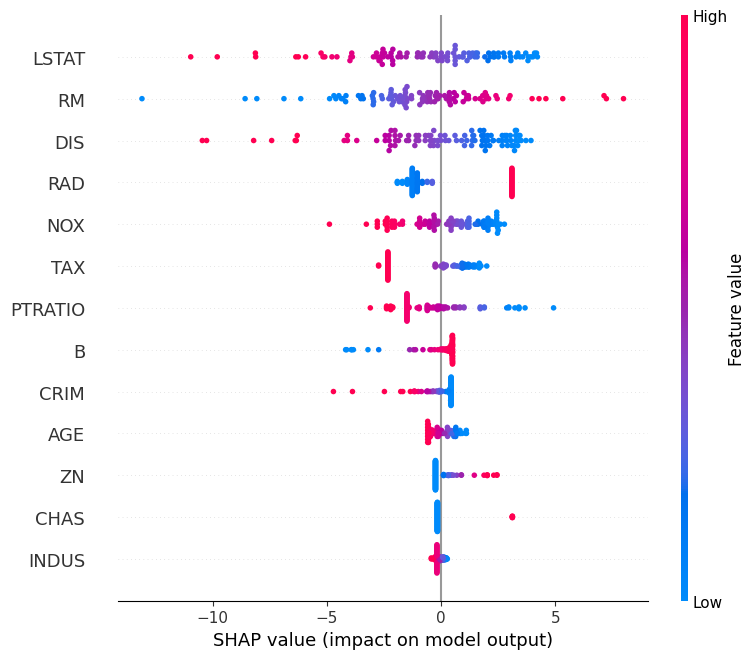

In [ ]:
# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=features)
# If you passed raw data through a pipeline to compute SHAP values, make sure 'features' matches the original feature names

In [ ]:
shap_values[1]

.values =
array([ 0.4351,  0.885 ,  0.1172,  3.1167,  1.8897,  1.9688,  0.6247,
       -0.4525, -1.262 ,  1.3983,  0.8205,  0.4972,  3.9237])

.base_values =
22.550155414057404

.data =
array([-0.3849,  1.2597, -0.6503,  3.6645, -0.9313,  0.6239, -1.3117,
        0.1266, -0.6244, -0.904 , -0.3227,  0.4442, -1.2775])

In [ ]:
X_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.380867,-0.479141,-0.330101,-0.272888,-0.395412,0.141282,0.302457,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.486011
1,-0.384871,1.259669,-0.650350,3.664502,-0.931315,0.623942,-1.311655,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.277454
2,-0.379285,-0.479141,2.526819,-0.272888,0.446720,-0.469805,1.103100,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.811037
3,-0.380882,-0.479141,0.005044,-0.272888,-1.220532,-0.354079,-2.231387,0.694876,-0.624360,-0.596698,0.396095,0.378682,-0.991615
4,0.185527,-0.479141,1.090911,-0.272888,1.331384,-0.026661,0.846601,-0.676503,1.706891,1.578434,0.845343,0.315043,0.696127


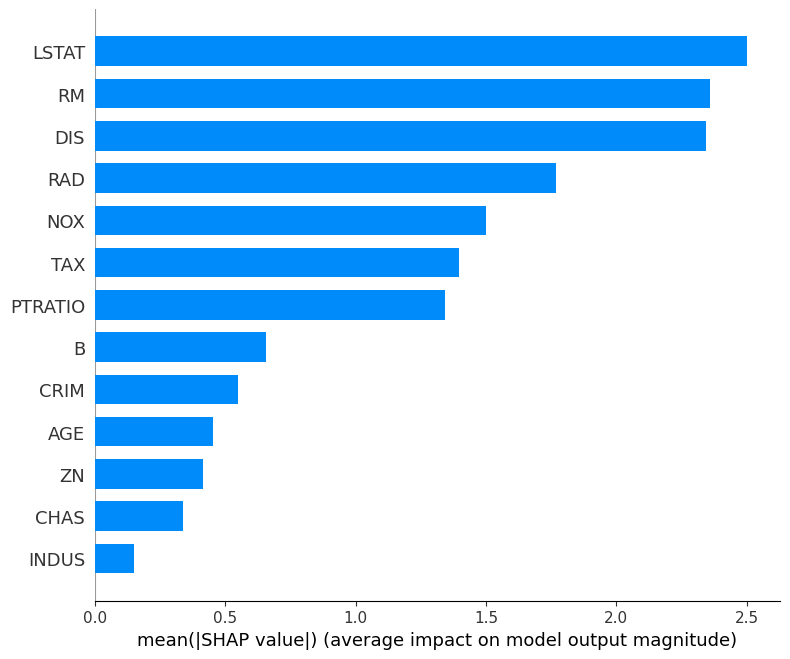

In [ ]:
# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=features, plot_type='bar')
# If you passed raw data through a pipeline to compute SHAP values, make sure 'features' matches the original feature names

1. Shap is open soruce and it doesn't fully compatible with the other packages. ( May be pytorch )
2. If there are 2 or more features are correlated, then shap values are approximated. Correlation can cause some unpredicted shap values.
3. A lot of permutations and combinations if there are more features.
4. Shap is not a measure of how important a given feature is in the real life, but rather than how important a given feature is for the model. ( Predictions can be in correct, not all models are 100% accurate. ) It is just a approximation.
5. No implementation of pyspark.
6. How about categorical Features?

# Generating for Neural Network Model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 2/102 [00:00<?, ?it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 4/102 [00:18<03:54,  2.39s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 5/102 [00:23<05:32,  3.43s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 6/102 [00:27<05:55,  3.70s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 7/102 [00:33<07:05,  4.48s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 8/102 [00:38<07:18,  4.67s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 9/102 [00:43<07:36,  4.91s/it]

40/40 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 10/102 [00:48<07:14,  4.72s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 11/102 [00:52<07:10,  4.73s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 12/102 [00:58<07:27,  4.98s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 13/102 [01:03<07:35,  5.12s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▎        | 14/102 [01:08<07:23,  5.04s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 15/102 [01:13<07:16,  5.02s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 16/102 [01:19<07:27,  5.21s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 17/102 [01:23<06:48,  4.80s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 18/102 [01:28<06:47,  4.85s/it]

40/40 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  19%|█▊        | 19/102 [01:35<07:33,  5.47s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 20/102 [01:39<07:05,  5.19s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 21/102 [01:46<07:31,  5.58s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 22/102 [01:51<07:22,  5.53s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 23/102 [01:57<07:20,  5.58s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 24/102 [02:01<06:54,  5.31s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██▍       | 25/102 [02:07<07:06,  5.54s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 26/102 [02:12<06:30,  5.13s/it]

40/40 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▋       | 27/102 [02:16<06:03,  4.85s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 28/102 [02:21<06:10,  5.00s/it]

40/40 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 29/102 [02:25<05:38,  4.64s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 30/102 [02:30<05:51,  4.88s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 31/102 [02:36<05:54,  4.99s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  31%|███▏      | 32/102 [02:41<05:46,  4.96s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 33/102 [02:46<05:55,  5.15s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 34/102 [02:50<05:23,  4.75s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 35/102 [02:54<05:10,  4.64s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 36/102 [02:59<05:15,  4.78s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▋      | 37/102 [03:04<05:09,  4.76s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 38/102 [03:10<05:20,  5.01s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 39/102 [03:14<05:04,  4.84s/it]

43/43 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  39%|███▉      | 40/102 [03:20<05:14,  5.07s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 41/102 [03:25<05:11,  5.10s/it]

44/44 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  41%|████      | 42/102 [03:30<05:10,  5.18s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 43/102 [03:36<05:17,  5.38s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 44/102 [03:42<05:11,  5.37s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 45/102 [03:47<05:14,  5.51s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|████▌     | 46/102 [03:52<04:59,  5.34s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 47/102 [03:58<04:51,  5.30s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 48/102 [04:03<04:50,  5.38s/it]

41/41 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  48%|████▊     | 49/102 [04:09<04:53,  5.54s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 50/102 [04:13<04:29,  5.18s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|█████     | 51/102 [04:19<04:24,  5.19s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|█████     | 52/102 [04:24<04:25,  5.31s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 53/102 [04:29<04:19,  5.29s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|█████▎    | 54/102 [04:35<04:21,  5.46s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▍    | 55/102 [04:41<04:17,  5.49s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▍    | 56/102 [04:46<04:12,  5.50s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 57/102 [04:51<03:53,  5.19s/it]

40/40 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 58/102 [04:55<03:37,  4.94s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 59/102 [05:01<03:49,  5.34s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  59%|█████▉    | 60/102 [05:06<03:38,  5.19s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|█████▉    | 61/102 [05:12<03:36,  5.28s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|██████    | 62/102 [05:18<03:38,  5.46s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 63/102 [05:23<03:33,  5.48s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 64/102 [05:28<03:24,  5.39s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▎   | 65/102 [05:34<03:24,  5.53s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|██████▍   | 66/102 [05:40<03:20,  5.57s/it]

43/43 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  66%|██████▌   | 67/102 [05:45<03:14,  5.55s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  67%|██████▋   | 68/102 [05:51<03:04,  5.43s/it]

44/44 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  68%|██████▊   | 69/102 [05:57<03:05,  5.63s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▊   | 70/102 [06:03<03:05,  5.78s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|██████▉   | 71/102 [06:07<02:48,  5.44s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 72/102 [06:13<02:46,  5.56s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 73/102 [06:18<02:30,  5.18s/it]

39/39 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 74/102 [06:22<02:20,  5.01s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▎  | 75/102 [06:28<02:21,  5.22s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▍  | 76/102 [06:33<02:14,  5.19s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 77/102 [06:38<02:08,  5.12s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▋  | 78/102 [06:44<02:06,  5.28s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 79/102 [06:50<02:06,  5.51s/it]

39/39 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 80/102 [06:54<01:51,  5.08s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 81/102 [07:00<01:51,  5.33s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 82/102 [07:05<01:46,  5.30s/it]

42/42 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  81%|████████▏ | 83/102 [07:10<01:39,  5.21s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 84/102 [07:16<01:38,  5.48s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 85/102 [07:20<01:24,  4.99s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 86/102 [07:25<01:22,  5.19s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▌ | 87/102 [07:31<01:18,  5.23s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▋ | 88/102 [07:36<01:12,  5.20s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|████████▋ | 89/102 [07:41<01:07,  5.21s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 90/102 [07:47<01:05,  5.48s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|████████▉ | 91/102 [07:53<01:01,  5.59s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|█████████ | 92/102 [07:59<00:55,  5.55s/it]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 93/102 [08:04<00:48,  5.38s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 94/102 [08:08<00:41,  5.23s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|█████████▎| 95/102 [08:14<00:38,  5.45s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▍| 96/102 [08:19<00:31,  5.24s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▌| 97/102 [08:25<00:26,  5.35s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 98/102 [08:29<00:20,  5.02s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 99/102 [08:34<00:14,  4.99s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 100/102 [08:39<00:10,  5.08s/it]

40/40 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▉| 101/102 [08:43<00:04,  4.80s/it]

42/42 [==============================] - 0s 3ms/step


PermutationExplainer explainer: 100%|██████████| 102/102 [08:49<00:00,  4.98s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 103it [08:55,  5.30s/it]

.values =
array([[ 1.6889,  0.5181, -0.8384, ...,  0.869 ,  0.4921,  1.4286],
       [ 1.4064, -1.1497, -0.6388, ..., -0.0757,  0.6675,  5.4518],
       [ 1.292 ,  0.3806,  2.2137, ..., -1.3618,  0.2299, -3.6912],
       ...,
       [-5.3259,  0.4193,  0.1503, ..., -1.2754, -2.3317, -4.6831],
       [ 1.631 ,  0.4412,  0.2823, ..., -0.8333,  0.5174, -0.6431],
       [ 1.6431,  0.3755, -0.8039, ..., -0.9813,  0.1291,  1.4737]])

.base_values =
array([[22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.8011],
       [22.80

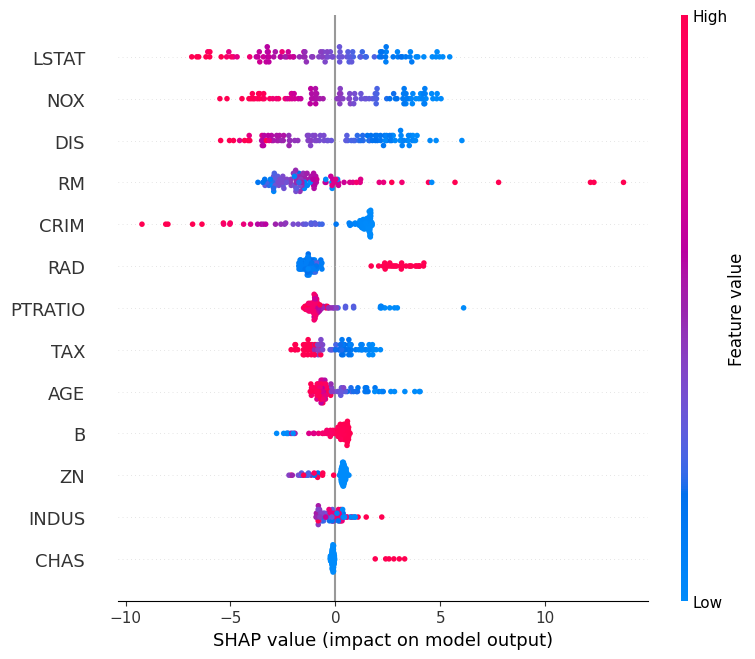

In [ ]:
import shap

# Initialize the SHAP Explainer
explainer = shap.Explainer(model.predict, X_train_scaled)

# Calculate SHAP values for the test set
shap_values = explainer(X_test_scaled)

print(shap_values)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=features)
# If you passed raw data through a pipeline to compute SHAP values, make sure 'features' matches the original feature names

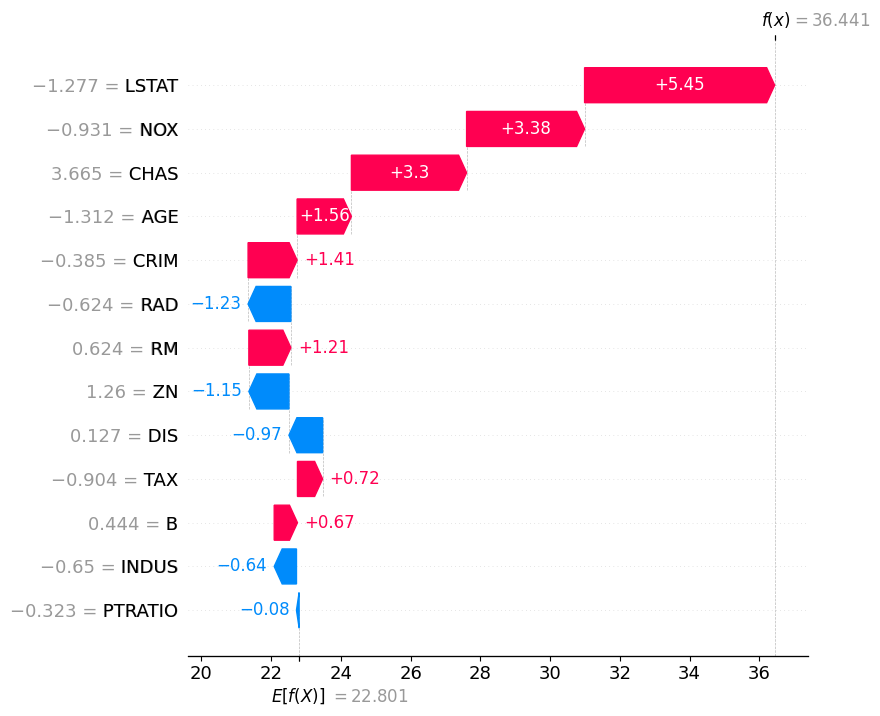

In [ ]:
# Generate a waterfall plot for the first observation in the test set
shap.plots.waterfall(shap_values[1], max_display=20,)